In [1]:
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
log_path = 'runs/debug/'
log_file = 'train_0.log'
sl =220
logs = pd.read_json(log_path+log_file, lines=True)

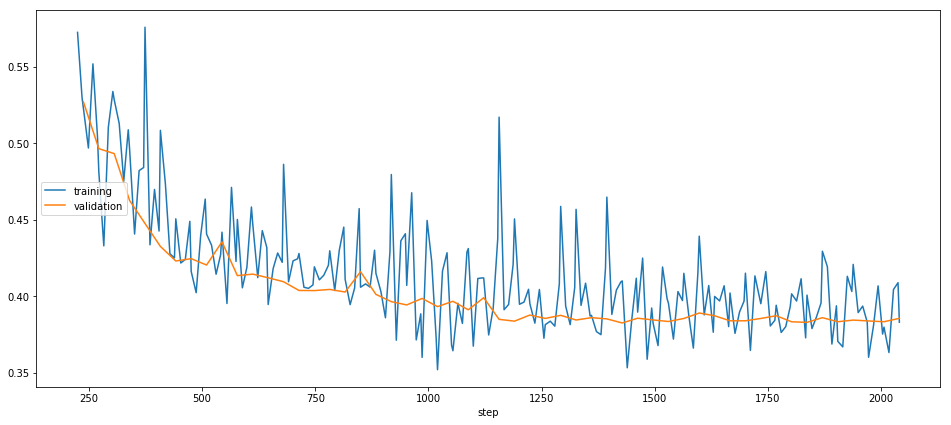

In [4]:
plt.figure(figsize=(26,6))
plt.subplot(1, 2, 1)
plt.plot(logs.step[(logs.loss.isna() == False) & (logs.step > sl)],
            logs.loss[(logs.loss.isna() == False) & (logs.step > sl)],
            label="training")
            
plt.plot(logs.step[(logs.valid_loss.isna() == False) & (logs.step > sl)],
            logs.valid_loss[(logs.valid_loss.isna() == False) & (logs.step > sl)],
            label = "validation")
         
plt.xlabel('step')
plt.legend(loc='center left')
        
plt.tight_layout()
plt.show();



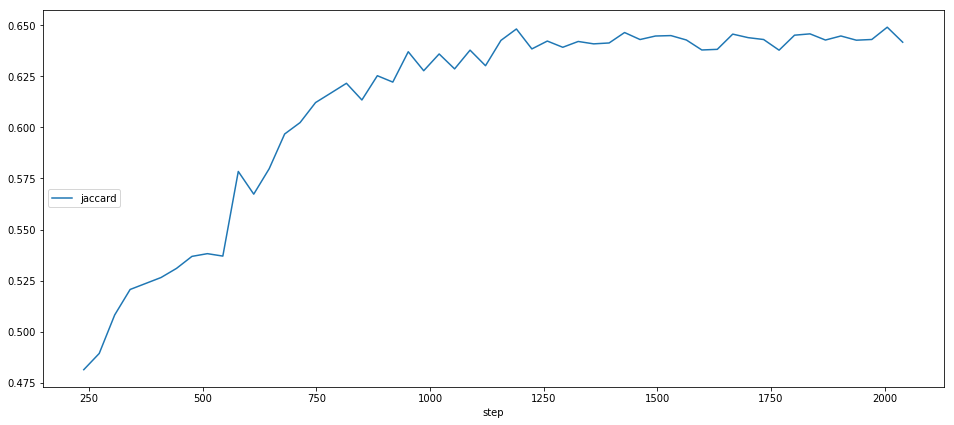

In [5]:
plt.figure(figsize=(26,6))
plt.subplot(1, 2, 1)
            
plt.plot(logs.step[(logs.valid_loss.isna() == False) & (logs.step > sl)],
            logs.jaccard_loss[(logs.valid_loss.isna() == False) & (logs.step > sl)],
            label = "jaccard")
         
plt.xlabel('step')
plt.legend(loc='center left')
        
plt.tight_layout()
plt.show();